# AML 2203 Assignment 1

## Web Scrapping Amazon BestSeller Products and performing Exploratory Data Analysis

`

#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
import warnings
warnings.filterwarnings('ignore')
print('Setup Complete!')

Setup Complete!


### 1. Web Scrapping

#### Building custom functions to scrap data from Amazon

We used built-in python library BeautifulSoup to scrap data from web.

In [2]:
def get_elec(pageNo):  
    headers = {
               "User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36", 
               "Accept-Encoding":"gzip, deflate, br", 
               "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9", 
               'Dpr': '1.25',
               "Connection":"close", 
               "Upgrade-Insecure-Requests":"1"
              }

    r1 = requests.get('https://www.amazon.com/Best-Sellers-Electronics/zgbs/electronics/ref=zg_bs_nav_0'+str(pageNo)+'?ie=UTF8&pg='+str(pageNo), headers=headers)#, proxies=proxies)
    content1 = r1.content
    soup1 = BeautifulSoup(content1)
    soup1.title

    alls = []
    for d in soup1.find_all('div', attrs={'class':"a-column a-span12 a-text-center _cDEzb_grid-column_2hIsc"}):
        name = d.find('div', attrs={'class':"_cDEzb_p13n-sc-css-line-clamp-3_g3dy1"})
        n = d.find_all('img', alt=True)
        rating = d.find('span', attrs={'class':'a-icon-alt'})
        users_rated = d.find('span', attrs={'class':'a-size-small'})
        price = d.find('span', attrs={'class':'p13n-sc-price'})
    
        all1=[]

        if name is not None:
            #print(n[0]['alt'])
            all1.append(n[0]['alt'])
        else:
            all1.append("unknown-product")

        if rating is not None:
            #print(rating.text)
            all1.append(rating.text)
        else:
            all1.append(None)

        if users_rated is not None:
            #print(price.text)
            all1.append(users_rated.text)
        else:
            all1.append(None)     

        if price is not None:
            #print(price.text)
            all1.append(price.text)
        else:
            price = d.find('span', attrs={'class':'_cDEzb_p13n-sc-price_3mJ9Z'})
            if price is not None:
                all1.append(price.text)
            else:
                all1.append(None)
        alls.append(all1)
    return alls

In [3]:
def get_books(pageNo):  
    headers = {
               "User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36", 
               "Accept-Encoding":"gzip, deflate, br", 
               "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9", 
               'Dpr': '1.25',
               "Connection":"close", 
               "Upgrade-Insecure-Requests":"1"
              }

    r1 = requests.get('https://www.amazon.com/best-sellers-books-Amazon/zgbs/books/ref=zg_bs_nav_0'+str(pageNo)+'?ie=UTF8&pg='+str(pageNo), headers=headers)#, proxies=proxies)
    content1 = r1.content
    soup1 = BeautifulSoup(content1)
    soup1.title

    alls = []
    for d in soup1.find_all('div', attrs={'class':"a-column a-span12 a-text-center _cDEzb_grid-column_2hIsc"}):
        name = d.find('div', attrs={'class':"_cDEzb_p13n-sc-css-line-clamp-2_EWgCb"})
        n = d.find_all('img', alt=True)
        rating = d.find('span', attrs={'class':'a-icon-alt'})
    # print(rating.string if rating else 'Not rated')
        users_rated = d.find('span', attrs={'class':'a-size-small'})
    # print(users_rated.string)
        price = d.find('span', attrs={'class':'_cDEzb_p13n-sc-price_3mJ9Z'})
    # print(price.string)
    
        all1=[]

        if name is not None:
            #print(n[0]['alt'])
            all1.append(n[0]['alt'])
        else:
            name = d.find('div', attrs={'class':"_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y"})
            all1.append(name.string)

        if rating is not None:
            #print(rating.text)
            all1.append(rating.text)
        else:
            all1.append(None)

        if users_rated is not None:
            # users_rated = re.sub(r'[^\d]','', users_rated.string)
            #print(price.text)
            all1.append(users_rated.text)
        else:
            all1.append(None)     

        if price is not None:
            #print(price.text)
            all1.append(price.text)
        else:
            all1.append(None)
        alls.append(all1) 
    return alls

In [4]:
def get_health(pageNo):  
    headers = {
               "User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36", 
               "Accept-Encoding":"gzip, deflate, br", 
               "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9", 
               'Dpr': '1.25',
               "Connection":"close", 
               "Upgrade-Insecure-Requests":"1"
              }

    r1 = requests.get('https://www.amazon.com/Best-Sellers-Health-Household/zgbs/hpc/ref=zg_bs_nav_0'+str(pageNo)+'?ie=UTF8&pg='+str(pageNo), headers=headers)#, proxies=proxies)
    content1 = r1.content
    soup1 = BeautifulSoup(content1)
    soup1.title

    alls = []
    for d in soup1.find_all('div', attrs={'class':"a-column a-span12 a-text-center _cDEzb_grid-column_2hIsc"}):
        name = d.find('div', attrs={'class':"_cDEzb_p13n-sc-css-line-clamp-2_EWgCb"})
        n = d.find_all('img', alt=True)
        rating = d.find('span', attrs={'class':'a-icon-alt'})
        users_rated = d.find('span', attrs={'class':'a-size-small'})
        price = d.find('span', attrs={'class':'_cDEzb_p13n-sc-price_3mJ9Z'})
    
        all1=[]

        if name is not None:
            all1.append(n[0]['alt'])
        else:
            name = d.find('div', attrs={'class':"_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y"})
            if name is not None:
                all1.append(n[0]['alt'])
            else:
                name = d.find('div', attrs={'class':"_cDEzb_p13n-sc-css-line-clamp-3_g3dy1"})
                all1.append(n[0]['alt'])

        if rating is not None:
            #print(rating.text)
            all1.append(rating.text)
        else:
            all1.append(None)

        if users_rated is not None:
            #print(price.text)
            all1.append(users_rated.text)
        else:
            all1.append(None)     

        if price is not None:
            all1.append(price.string)
        else:
            price = d.find('span', attrs={'class':'p13n-sc-price'})
            if price is not None:
                all1.append(price.string)
            else:
                all1.append(None)
        alls.append(all1)
    return alls

### Creating the dataset
 We scrapped the product name, rating of the product, number of customer ratings, price and category of the products and created a dataset in csv format.

In [7]:
no_pages = 11
r1, r2, r3 = [], [], []
for i in range(1, no_pages+1):
    r1.append(get_books(i))
    r2.append(get_elec(i))
    r3.append(get_health(i))
flatten = lambda l: [item for sublist in l for item in sublist]
df1 = pd.DataFrame(flatten(r1),columns=['Product Name','Rating','Customers_Rated', 'Price'])
df2 = pd.DataFrame(flatten(r2),columns=['Product Name','Rating','Customers_Rated', 'Price'])
df3 = pd.DataFrame(flatten(r3),columns=['Product Name','Rating','Customers_Rated', 'Price'])
df1['Category'] = 'Books'
df2['Category'] = 'Electronics'
df3['Category'] = 'Health and Household'
df = pd.concat([df1, df2, df3])
df = df.sample(frac=1).reset_index(drop=True)
df.to_csv('amazon_products.csv', index=False, encoding='utf-8')

### 2. Data Wrangling

#### Visualizing the dataset

In [8]:
df = pd.read_csv('amazon_products.csv')
df

Product Name              Rating  \
0    Balloons over Broadway: The True Story of the ...  4.9 out of 5 stars   
1    Half Baked Harvest Super Simple: More Than 125...  4.8 out of 5 stars   
2                                       Turkey Trouble  4.8 out of 5 stars   
3    Bose QuietComfort 45 Bluetooth Wireless Noise ...  4.7 out of 5 stars   
4    Braiding Sweetgrass: Indigenous Wisdom, Scient...  4.8 out of 5 stars   
..                                                 ...                 ...   
715  Goodnight, Goodnight Construction Site (Board ...  4.9 out of 5 stars   
716  (3 Pack) ONEBOM Firestick Remote Cover 3rd Gen...  4.6 out of 5 stars   
717  Bitvae Water Flosser Professional for Teeth , ...  4.3 out of 5 stars   
718  Melissa & Doug Let's Play House Dust! Sweep! M...  4.8 out of 5 stars   
719  Wired Earbuds with Microphone, Kimwood Wired E...  4.4 out of 5 stars   

    Customers_Rated    Price              Category  
0             1,525   $12.19                 Books  
1            11,626   $18.27                 Books  
2             5,487    $7.84                 Books  
3             8,749  $329.00           Electronics  
4            14,351   $13.25                 Books  
..              ...      ...                   ...  
715          20,438    $4.28                 Books  
716           1,948    $8.99           Electronics  
717           2,375   $29.99  Health and Household  
718          40,983   $25.00  Health and Household  
719           3,844   $12.99           Electronics  

[720 rows x 5 columns]

In [9]:
df.head(5)

Product Name              Rating  \
0  Balloons over Broadway: The True Story of the ...  4.9 out of 5 stars   
1  Half Baked Harvest Super Simple: More Than 125...  4.8 out of 5 stars   
2                                     Turkey Trouble  4.8 out of 5 stars   
3  Bose QuietComfort 45 Bluetooth Wireless Noise ...  4.7 out of 5 stars   
4  Braiding Sweetgrass: Indigenous Wisdom, Scient...  4.8 out of 5 stars   

  Customers_Rated    Price     Category  
0           1,525   $12.19        Books  
1          11,626   $18.27        Books  
2           5,487    $7.84        Books  
3           8,749  $329.00  Electronics  
4          14,351   $13.25        Books

In [10]:
df.shape

(720, 5)

In [11]:
df.dtypes

Product Name       object
Rating             object
Customers_Rated    object
Price              object
Category           object
dtype: object

In [12]:
df.isna().sum()

Product Name       0
Rating             8
Customers_Rated    1
Price              6
Category           0
dtype: int64

* As Rating, Customers_Rated and Price should be numerical columns, we'll convert it

##### Converting Customer_Rated to int64

In [13]:
df1 = df.copy()  # Creating a copy to work and then make changes to original df

In [14]:
df['Customers_Rated'] = df["Customers_Rated"].str.replace('[^\d]', '')  # Removing strings from Customers Rated column

In [15]:
df['Customers_Rated'] = np.where(df["Customers_Rated"] == '', '0', df['Customers_Rated']) # Replacing empty strings with 0 in order to convert the attribute to numeric

In [16]:
df['Customers_Rated'] = df['Customers_Rated'].fillna('0') # Filling null values with 0 for easier conversion of attribute from object to int64

In [17]:
df['Customers_Rated'] = df['Customers_Rated'].astype('int64') # Converting the attribute to numeric

In [18]:
df['Customers_Rated']

0       1525
1      11626
2       5487
3       8749
4      14351
       ...  
715    20438
716     1948
717     2375
718    40983
719     3844
Name: Customers_Rated, Length: 720, dtype: int64

In [19]:
pd.options.display.max_rows = 720

In [20]:
df['Customers_Rated'].value_counts()

0         38
47080      4
958        4
25474      3
23655      2
103        2
64         2
4166       2
117        2
210508     2
11238      2
43763      2
121747     2
362157     2
398        2
61         2
5319       2
2042       2
184522     2
21536      2
28420      2
1433       2
51221      2
13444      2
13428      2
20         2
1836       2
273        1
758        1
24027      1
83194      1
17689      1
6838       1
15255      1
1317       1
1525       1
40579      1
32         1
53169      1
137129     1
70257      1
14777      1
16208      1
41637      1
71555      1
14289      1
35         1
242        1
8814       1
198        1
3161       1
64730      1
2761       1
2223       1
37534      1
19950      1
2156       1
32757      1
35992      1
23279      1
36955      1
67041      1
13122      1
39589      1
676        1
13986      1
53836      1
21789      1
93300      1
186167     1
1827       1
36434      1
190692     1
1404       1
15740      1
133035     1
19757      1

In [21]:
df.dtypes

Product Name       object
Rating             object
Customers_Rated     int64
Price              object
Category           object
dtype: object

##### Converting Price column to float

In [22]:
df['Price'].isna().sum()

6

In [23]:
df['Price'][:5]

0     $12.19
1     $18.27
2      $7.84
3    $329.00
4     $13.25
Name: Price, dtype: object

In [24]:
df["Price"] = df["Price"].str.replace('$', '') # Removing the $ sign from values

In [25]:
 df['Price'] = df['Price'].str.replace(',', '') # Removing the commas from values

In [26]:
df['Price'].value_counts()

14.99      18
19.99      14
9.99       14
29.99      12
16.99      11
39.99       9
14.00       9
17.99       9
12.99       8
20.99       8
13.99       7
24.99       7
5.99        7
6.99        7
8.99        6
79.99       6
4.99        6
59.99       6
11.99       6
34.99       5
5.00        5
3.99        5
22.99       5
10.99       4
9.98        4
25.99       4
15.99       4
16.49       4
26.99       4
7.49        4
8.49        4
7.98        4
8.98        4
13.59       3
29.95       3
4.98        3
11.98       3
15.97       3
12.97       3
27.99       3
15.29       3
15.00       3
69.99       3
11.90       3
13.29       3
6.28        3
49.99       2
119.99      2
13.19       2
89.99       2
64.39       2
12.19       2
19.59       2
45.99       2
6.49        2
9.59        2
11.00       2
99.99       2
29.00       2
17.98       2
13.97       2
13.20       2
5.34        2
16.98       2
32.49       2
109.99      2
21.99       2
69.95       2
99.95       2
7.00        2
21.00       2
139.99

In [27]:
df['Price'] = df['Price'].astype(float) # converting string attribute to float

In [28]:
df.dtypes

Product Name        object
Rating              object
Customers_Rated      int64
Price              float64
Category            object
dtype: object

##### Converting Rating to numeric and just keeping the rating and removing 'out of 5 stars'

In [29]:
df['Rating']

0      4.9 out of 5 stars
1      4.8 out of 5 stars
2      4.8 out of 5 stars
3      4.7 out of 5 stars
4      4.8 out of 5 stars
5      4.7 out of 5 stars
6      4.8 out of 5 stars
7      4.4 out of 5 stars
8      4.4 out of 5 stars
9      4.9 out of 5 stars
10     4.8 out of 5 stars
11     4.7 out of 5 stars
12     4.4 out of 5 stars
13     4.7 out of 5 stars
14     4.7 out of 5 stars
15     4.6 out of 5 stars
16     4.9 out of 5 stars
17     4.8 out of 5 stars
18     4.5 out of 5 stars
19     4.7 out of 5 stars
20     4.8 out of 5 stars
21     4.4 out of 5 stars
22     4.7 out of 5 stars
23     4.7 out of 5 stars
24     4.7 out of 5 stars
25     4.6 out of 5 stars
26     4.8 out of 5 stars
27     4.8 out of 5 stars
28     4.7 out of 5 stars
29     4.4 out of 5 stars
30     4.8 out of 5 stars
31     4.9 out of 5 stars
32     4.3 out of 5 stars
33     4.6 out of 5 stars
34     4.8 out of 5 stars
35     4.5 out of 5 stars
36     4.6 out of 5 stars
37     4.7 out of 5 stars
38     4.8 o

In [30]:
df['Rating'].isna().mean() * 100

1.1111111111111112

* Since, only 1.8% values are missing, we will replace them with 0

In [31]:
df['Rating'] = df['Rating'].replace(np.nan, '0')

In [32]:
df['Rating'].isna().sum()

0

In [33]:
df['Rating'] = df['Rating'].apply(lambda x: x.split()[0]) # Lambda function to remove 'out of 5 stars' string 
df['Rating'] 

0      4.9
1      4.8
2      4.8
3      4.7
4      4.8
5      4.7
6      4.8
7      4.4
8      4.4
9      4.9
10     4.8
11     4.7
12     4.4
13     4.7
14     4.7
15     4.6
16     4.9
17     4.8
18     4.5
19     4.7
20     4.8
21     4.4
22     4.7
23     4.7
24     4.7
25     4.6
26     4.8
27     4.8
28     4.7
29     4.4
30     4.8
31     4.9
32     4.3
33     4.6
34     4.8
35     4.5
36     4.6
37     4.7
38     4.8
39       0
40     4.8
41     4.8
42     4.2
43     4.5
44     4.8
45     4.5
46     4.8
47     4.6
48     4.6
49     4.4
50     4.7
51     4.4
52     4.3
53     4.7
54     4.6
55     4.6
56     4.2
57     4.8
58     4.9
59       0
60     4.7
61     4.7
62     4.5
63     4.6
64     4.6
65     4.7
66     3.8
67     4.7
68     4.8
69     4.6
70     4.8
71     4.6
72     4.8
73     4.8
74     4.7
75     4.8
76     4.6
77     4.4
78     4.8
79     4.6
80     4.8
81     4.7
82     4.6
83     4.6
84     4.6
85     4.4
86     4.9
87     4.8
88     4.9
89     4.4
90     4.8

In [34]:
df['Rating'] = pd.to_numeric(df['Rating'])  # converting string column to numeric

In [35]:
df.dtypes

Product Name        object
Rating             float64
Customers_Rated      int64
Price              float64
Category            object
dtype: object

In [36]:
df.isna().sum()

Product Name       0
Rating             0
Customers_Rated    0
Price              6
Category           0
dtype: int64

* Since the null values in rest of columns have been replaced by 0, we will replace them with Nan once again to calculate total missing values

In [37]:
df['Rating'] = df['Rating'].replace(0, np.nan) # replacing all the zeros with null values to check total number of null values

In [38]:
df['Customers_Rated'] = df['Customers_Rated'].replace(0, np.nan)

In [39]:
df.isna().mean() * 100

Product Name       0.000000
Rating             1.111111
Customers_Rated    5.277778
Price              0.833333
Category           0.000000
dtype: float64

* We are taking data from the real world and since there are very less missing values and only close 5% in single column, we will drop all the missing values from our dataset

In [40]:
df = df.dropna()

In [41]:
df.isna().sum()

Product Name       0
Rating             0
Customers_Rated    0
Price              0
Category           0
dtype: int64

###### Visualizing dataset after completing data wrangling

In [42]:
pd.options.display.max_rows = 10  # to set the number of rows to be displayed

In [43]:
df

Product Name  Rating  \
0    Balloons over Broadway: The True Story of the ...     4.9   
1    Half Baked Harvest Super Simple: More Than 125...     4.8   
2                                       Turkey Trouble     4.8   
3    Bose QuietComfort 45 Bluetooth Wireless Noise ...     4.7   
4    Braiding Sweetgrass: Indigenous Wisdom, Scient...     4.8   
..                                                 ...     ...   
715  Goodnight, Goodnight Construction Site (Board ...     4.9   
716  (3 Pack) ONEBOM Firestick Remote Cover 3rd Gen...     4.6   
717  Bitvae Water Flosser Professional for Teeth , ...     4.3   
718  Melissa & Doug Let's Play House Dust! Sweep! M...     4.8   
719  Wired Earbuds with Microphone, Kimwood Wired E...     4.4   

     Customers_Rated   Price              Category  
0             1525.0   12.19                 Books  
1            11626.0   18.27                 Books  
2             5487.0    7.84                 Books  
3             8749.0  329.00           Electronics  
4            14351.0   13.25                 Books  
..               ...     ...                   ...  
715          20438.0    4.28                 Books  
716           1948.0    8.99           Electronics  
717           2375.0   29.99  Health and Household  
718          40983.0   25.00  Health and Household  
719           3844.0   12.99           Electronics  

[676 rows x 5 columns]

###### let's reset our index

In [44]:
# df1 = df.copy()

In [45]:
df = df.reset_index(drop=True)

In [46]:
df

Product Name  Rating  \
0    Balloons over Broadway: The True Story of the ...     4.9   
1    Half Baked Harvest Super Simple: More Than 125...     4.8   
2                                       Turkey Trouble     4.8   
3    Bose QuietComfort 45 Bluetooth Wireless Noise ...     4.7   
4    Braiding Sweetgrass: Indigenous Wisdom, Scient...     4.8   
..                                                 ...     ...   
671  Goodnight, Goodnight Construction Site (Board ...     4.9   
672  (3 Pack) ONEBOM Firestick Remote Cover 3rd Gen...     4.6   
673  Bitvae Water Flosser Professional for Teeth , ...     4.3   
674  Melissa & Doug Let's Play House Dust! Sweep! M...     4.8   
675  Wired Earbuds with Microphone, Kimwood Wired E...     4.4   

     Customers_Rated   Price              Category  
0             1525.0   12.19                 Books  
1            11626.0   18.27                 Books  
2             5487.0    7.84                 Books  
3             8749.0  329.00           Electronics  
4            14351.0   13.25                 Books  
..               ...     ...                   ...  
671          20438.0    4.28                 Books  
672           1948.0    8.99           Electronics  
673           2375.0   29.99  Health and Household  
674          40983.0   25.00  Health and Household  
675           3844.0   12.99           Electronics  

[676 rows x 5 columns]

In [47]:
df.shape

(676, 5)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product Name     676 non-null    object 
 1   Rating           676 non-null    float64
 2   Customers_Rated  676 non-null    float64
 3   Price            676 non-null    float64
 4   Category         676 non-null    object 
dtypes: float64(3), object(2)
memory usage: 26.5+ KB


In [49]:
df.describe()

Rating  Customers_Rated        Price
count  676.000000       676.000000   676.000000
mean     4.621746     39626.671598    39.747396
std      0.211836     69396.114823    96.450327
min      3.600000         1.000000     3.000000
25%      4.500000      5379.500000    10.990000
50%      4.700000     21224.000000    16.990000
75%      4.800000     47176.000000    28.992500
max      5.000000    976183.000000  1471.990000

* Let's view statistics for each numerical attribute

In [50]:
print('Customers_Rated')
print('Maximum: ', df['Customers_Rated'].max())
print('Minimum: ', df['Customers_Rated'].min())
print('Mean: ', df['Customers_Rated'].mean())
print('Count: ', df['Customers_Rated'].count())

Customers_Rated
Maximum:  976183.0
Minimum:  1.0
Mean:  39626.67159763313
Count:  676


In [51]:
print('Price')
print('Maximum: ', df['Price'].max())
print('Minimum: ', df['Price'].min())
print('Mean: ', df['Price'].mean())
print('Count: ', df['Price'].count())

Price
Maximum:  1471.99
Minimum:  3.0
Mean:  39.74739644970441
Count:  676


In [52]:
print('Rating')
print('Maximum: ', df['Rating'].max())
print('Minimum: ', df['Rating'].min())
print('Mean: ', df['Rating'].mean())
print('Count: ', df['Rating'].count())

Rating
Maximum:  5.0
Minimum:  3.6
Mean:  4.621745562130176
Count:  676


### 3. Data Visualization

Now let's visualize different columns using matplotlib

In [53]:
df2 = df.select_dtypes(exclude=['object'])
df2

Rating  Customers_Rated   Price
0       4.9           1525.0   12.19
1       4.8          11626.0   18.27
2       4.8           5487.0    7.84
3       4.7           8749.0  329.00
4       4.8          14351.0   13.25
..      ...              ...     ...
671     4.9          20438.0    4.28
672     4.6           1948.0    8.99
673     4.3           2375.0   29.99
674     4.8          40983.0   25.00
675     4.4           3844.0   12.99

[676 rows x 3 columns]

In [54]:
corr_matrix = df2.corr().abs()
corr_matrix

Rating  Customers_Rated     Price
Rating           1.000000         0.067709  0.092021
Customers_Rated  0.067709         1.000000  0.065716
Price            0.092021         0.065716  1.000000

* Since there is no corelation greater than 0.3, we see that these columns are not really correlated

#### Potting histograms for each numerical attribute

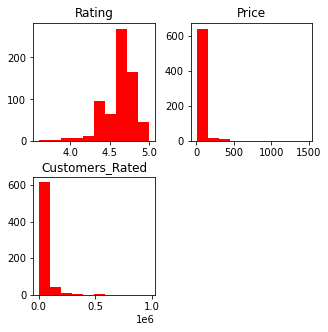

In [55]:
df[['Rating', 'Price', 'Customers_Rated']].hist(bins= 10, figsize=(5,5), grid=False, color='red');

* As you can see Price and Customers_Rated columns are highly skewed while Rating column is moderately skewed

#### Plotting histogram for our category column

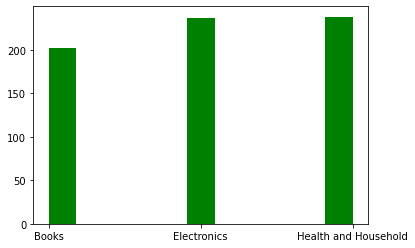

In [56]:
plt.hist(df['Category'], bins=11, color='green');

In [57]:
df['Category'].value_counts()

Health and Household    238
Electronics             236
Books                   202
Name: Category, dtype: int64

#### Visualizing products with rating = 4.9 and plotting them sorted based on no of users who have rated it

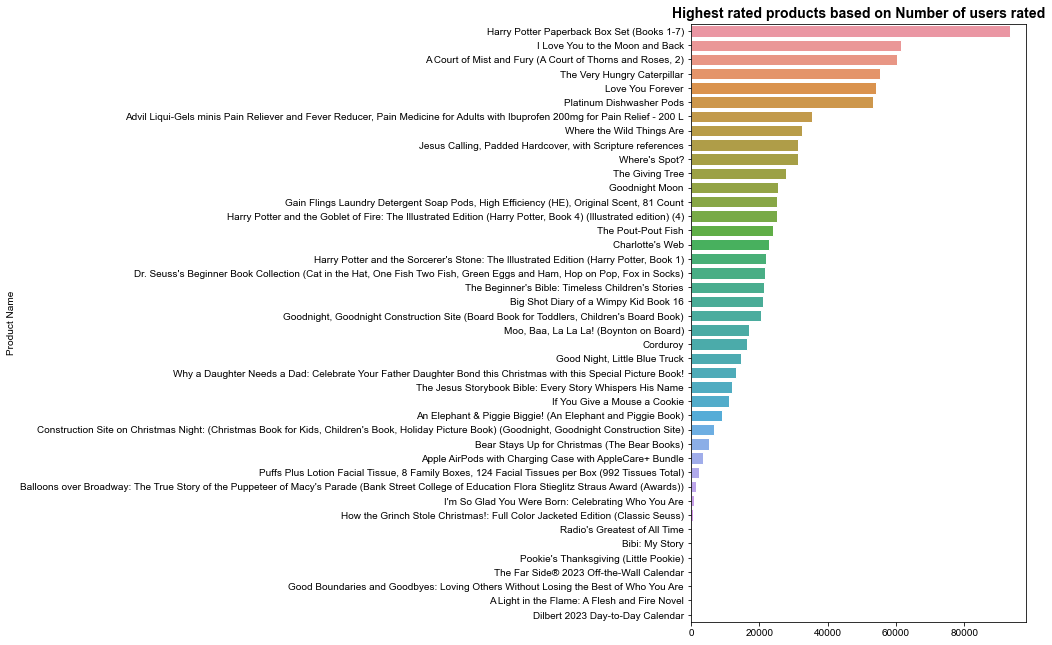

In [58]:
x = df[df['Rating'] == 4.9]
y = x.groupby('Product Name').Customers_Rated.mean().sort_values(ascending=False)
plt.figure(figsize= (6,11))
plt.title('Highest rated products based on Number of users rated', fontweight='bold', fontsize='14', loc='center')
sns.set_style('whitegrid')
sns.barplot(y.values, y.index);

#### Visualizing Ratings and Customers_Rated relation

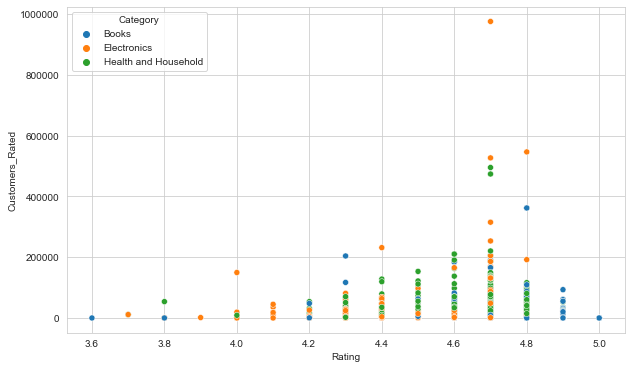

In [59]:
plt.figure(figsize=(10,6))
plt.ticklabel_format(useOffset=False, style='plain')
sns.scatterplot(x='Rating', y='Customers_Rated', data=df, hue='Category');

#### Visualizing Ratings and Price relation

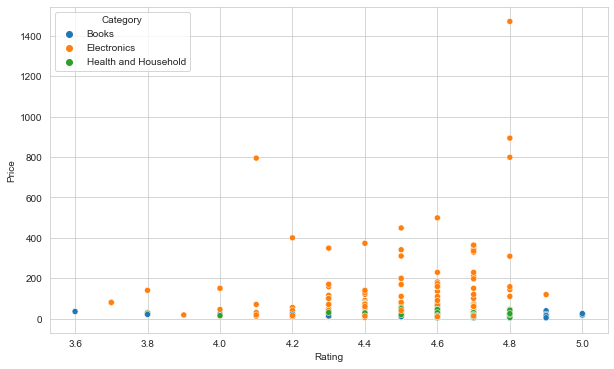

In [60]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Rating', y='Price', data=df, hue='Category');

#### Prices as compared to Rating

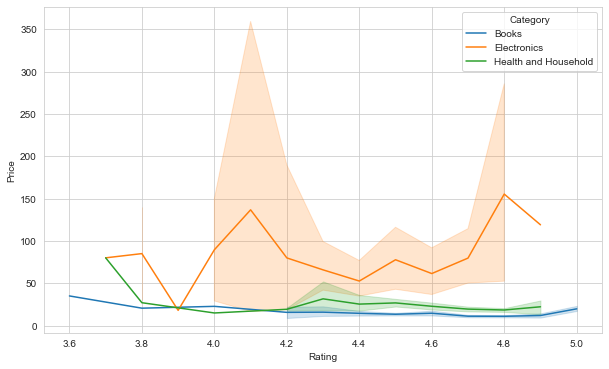

In [61]:
plt.figure(figsize=(10,6))
plt.ticklabel_format(useOffset=False, style='plain')
sns.lineplot(x='Rating', y='Price', data=df, hue='Category');

#### Plotting an interactive plot to show ratings of top 10 products based on customers_rated

In [62]:
df3 = df.groupby('Product Name').mean().sort_values('Customers_Rated', ascending=False).reset_index().head(10)

In [63]:
import plotly.express as px
fig = px.scatter(df3, x='Rating', y='Customers_Rated', color='Product Name')

fig.update_traces(marker=dict(size=10,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show();

#### Plotting an interactive plot to show prices of top 10 products based on customers_rated

In [64]:
df4 = df.groupby('Product Name').mean().sort_values('Customers_Rated', ascending=False).reset_index().head(10)

In [65]:

fig = px.scatter(df4, x='Price', y='Customers_Rated', color='Product Name')

fig.update_traces(marker=dict(size=10,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show();

## 4. Pandas Profiling

In [66]:
from pandas_profiling import ProfileReport

In [67]:
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file("pandas_profiling.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 5. Encoding

* Since we have only one categorical column, Let's encode it to numerical ones

In [68]:
df1 = df.copy()

In [69]:
df['Category'].value_counts() 

Health and Household    238
Electronics             236
Books                   202
Name: Category, dtype: int64

#### We will display two methods of encoding using label encoding and one hot encoding

#### Label encoding

In [70]:
df[['Category']]

Category
0                   Books
1                   Books
2                   Books
3             Electronics
4                   Books
..                    ...
671                 Books
672           Electronics
673  Health and Household
674  Health and Household
675           Electronics

[676 rows x 1 columns]

In [71]:
df["Category"] = df["Category"].astype('category')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Product Name     676 non-null    object  
 1   Rating           676 non-null    float64 
 2   Customers_Rated  676 non-null    float64 
 3   Price            676 non-null    float64 
 4   Category         676 non-null    category
dtypes: category(1), float64(3), object(1)
memory usage: 22.0+ KB


In [73]:
df["Category"] = df["Category"].cat.codes

In [74]:
df

Product Name  Rating  \
0    Balloons over Broadway: The True Story of the ...     4.9   
1    Half Baked Harvest Super Simple: More Than 125...     4.8   
2                                       Turkey Trouble     4.8   
3    Bose QuietComfort 45 Bluetooth Wireless Noise ...     4.7   
4    Braiding Sweetgrass: Indigenous Wisdom, Scient...     4.8   
..                                                 ...     ...   
671  Goodnight, Goodnight Construction Site (Board ...     4.9   
672  (3 Pack) ONEBOM Firestick Remote Cover 3rd Gen...     4.6   
673  Bitvae Water Flosser Professional for Teeth , ...     4.3   
674  Melissa & Doug Let's Play House Dust! Sweep! M...     4.8   
675  Wired Earbuds with Microphone, Kimwood Wired E...     4.4   

     Customers_Rated   Price  Category  
0             1525.0   12.19         0  
1            11626.0   18.27         0  
2             5487.0    7.84         0  
3             8749.0  329.00         1  
4            14351.0   13.25         0  
..               ...     ...       ...  
671          20438.0    4.28         0  
672           1948.0    8.99         1  
673           2375.0   29.99         2  
674          40983.0   25.00         2  
675           3844.0   12.99         1  

[676 rows x 5 columns]

In [75]:
df.dtypes

Product Name        object
Rating             float64
Customers_Rated    float64
Price              float64
Category              int8
dtype: object

* So we have done label encoding and categories have been encoded as 0, 1 and 2

#### One hot encoding

In [76]:
df1 = pd.get_dummies(df1, prefix=['Cat'], columns=['Category'])

In [77]:
df1

Product Name  Rating  \
0    Balloons over Broadway: The True Story of the ...     4.9   
1    Half Baked Harvest Super Simple: More Than 125...     4.8   
2                                       Turkey Trouble     4.8   
3    Bose QuietComfort 45 Bluetooth Wireless Noise ...     4.7   
4    Braiding Sweetgrass: Indigenous Wisdom, Scient...     4.8   
..                                                 ...     ...   
671  Goodnight, Goodnight Construction Site (Board ...     4.9   
672  (3 Pack) ONEBOM Firestick Remote Cover 3rd Gen...     4.6   
673  Bitvae Water Flosser Professional for Teeth , ...     4.3   
674  Melissa & Doug Let's Play House Dust! Sweep! M...     4.8   
675  Wired Earbuds with Microphone, Kimwood Wired E...     4.4   

     Customers_Rated   Price  Cat_Books  Cat_Electronics  \
0             1525.0   12.19          1                0   
1            11626.0   18.27          1                0   
2             5487.0    7.84          1                0   
3             8749.0  329.00          0                1   
4            14351.0   13.25          1                0   
..               ...     ...        ...              ...   
671          20438.0    4.28          1                0   
672           1948.0    8.99          0                1   
673           2375.0   29.99          0                0   
674          40983.0   25.00          0                0   
675           3844.0   12.99          0                1   

     Cat_Health and Household  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  
..                        ...  
671                         0  
672                         0  
673                         1  
674                         1  
675                         0  

[676 rows x 7 columns]

* That is how one hot encoding is complete where we have 3 columns for 3 values of Category column each have 1 where value is true else false

Since Label encoding does not create multiple columns, only 1 which is sufficient for our modellling so we choose label encoded df

## 6. Boxplots and IQR

##### IQR

In [78]:
df.describe()

Rating  Customers_Rated        Price    Category
count  676.000000       676.000000   676.000000  676.000000
mean     4.621746     39626.671598    39.747396    1.053254
std      0.211836     69396.114823    96.450327    0.805613
min      3.600000         1.000000     3.000000    0.000000
25%      4.500000      5379.500000    10.990000    0.000000
50%      4.700000     21224.000000    16.990000    1.000000
75%      4.800000     47176.000000    28.992500    2.000000
max      5.000000    976183.000000  1471.990000    2.000000

* Since we know, Customers_Rated and Price have a large range of values, so let's calculate IQR for both of them and find out upper and lower whiskers

###### For Customers_Rated

In [79]:
Q1_Customers_Rated = df['Customers_Rated'].quantile(.25)
Q3_Customers_Rated = df['Customers_Rated'].quantile(.75)
IQR_Customers_Rated = Q3_Customers_Rated - Q1_Customers_Rated
IQR_Customers_Rated

41796.5

In [80]:
UW_Customers_Rated = Q3_Customers_Rated + (1.5 * IQR_Customers_Rated)
LW_Customers_Rated = Q1_Customers_Rated - (1.5 * IQR_Customers_Rated)

In [81]:
print('Customers_Rated')
print(f'Quantile 1 value = {Q1_Customers_Rated}')
print(f'Quantile 3 value = {Q3_Customers_Rated}')
print(f'IQR value = {IQR_Customers_Rated}')
print(f'Upper Whisker Value = {UW_Customers_Rated}')
print(f'Lower Whisker Value = {LW_Customers_Rated}')

Customers_Rated
Quantile 1 value = 5379.5
Quantile 3 value = 47176.0
IQR value = 41796.5
Upper Whisker Value = 109870.75
Lower Whisker Value = -57315.25


##### All the values above UW are outliers and since LW is a negative value, it can be considered as the minimum value on the boxplot i.e 0


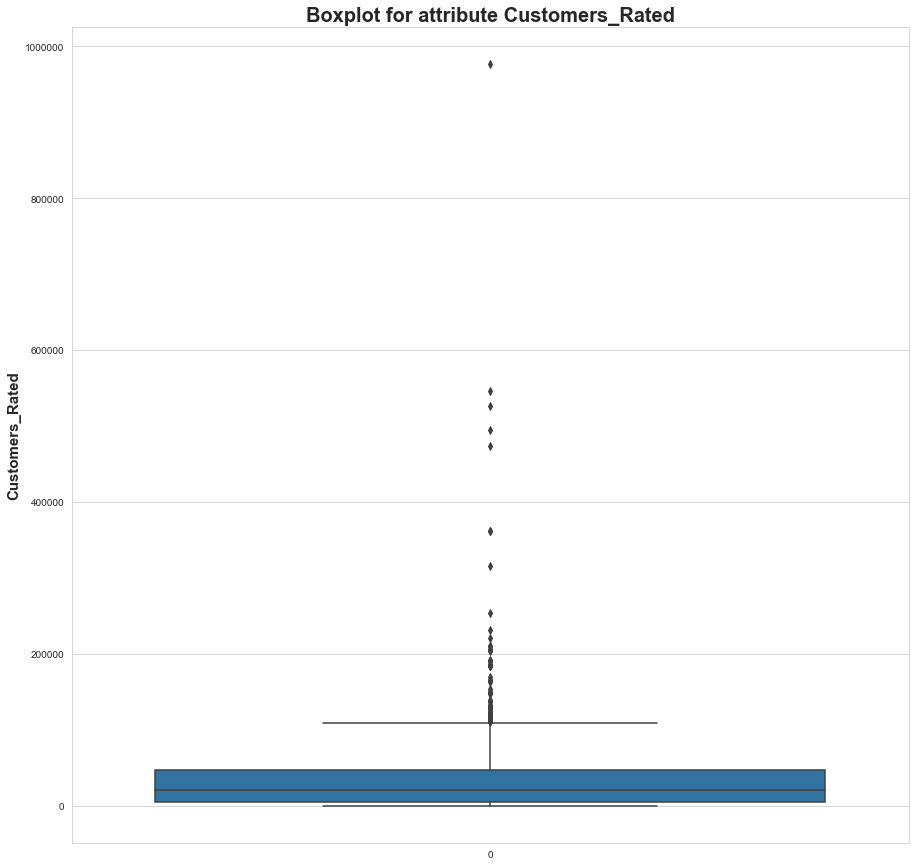

In [82]:
plt.figure(figsize=(15,15))
plt.ticklabel_format(useOffset=False, style='plain')
ax = sns.boxplot(data=df['Customers_Rated'])
ax.set_title('Boxplot for attribute Customers_Rated', fontweight='bold', fontsize='20')
ax.set_ylabel('Customers_Rated', fontweight='bold', fontsize='15');


* As you can see from boxplot above, all the small dots above upper whisker are the outliers

###### For Price

In [83]:
Q1_Price = df['Price'].quantile(.25)
Q3_Price = df['Price'].quantile(.75)
IQR_Price = Q3_Price - Q1_Price
IQR_Price

18.002499999999998

In [84]:
UW_Price = Q3_Price + (1.5 * IQR_Price)
LW_Price = Q1_Price - (1.5 * IQR_Price)

In [85]:
print('Price')
print(f'Quantile 1 value = {Q1_Price}')
print(f'Quantile 3 value = {Q3_Price}')
print(f'IQR value = {IQR_Price}')
print(f'Upper Whisker Value = {UW_Price}')
print(f'Lower Whisker Value = {LW_Price}')

Price
Quantile 1 value = 10.99
Quantile 3 value = 28.9925
IQR value = 18.002499999999998
Upper Whisker Value = 55.996249999999996
Lower Whisker Value = -16.013749999999995


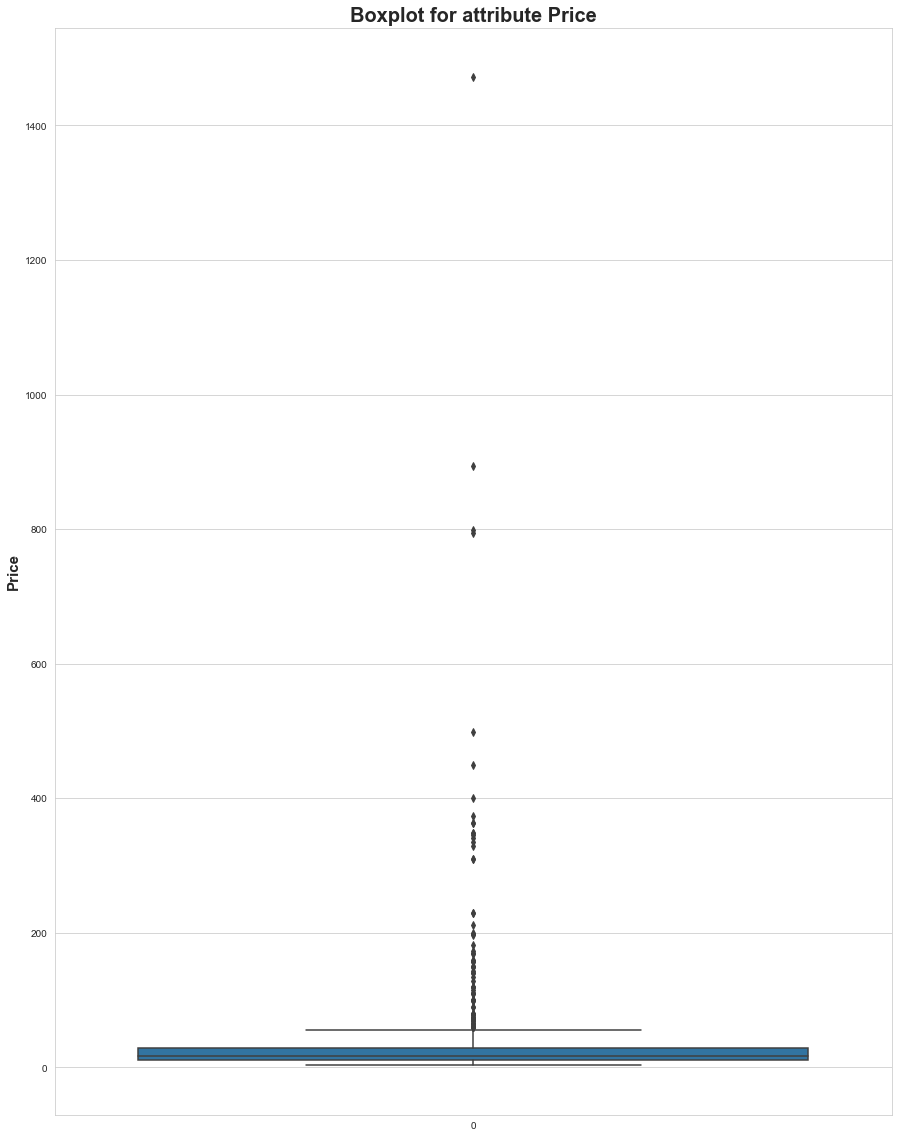

In [86]:
plt.figure(figsize=(15,20))
plt.ticklabel_format(useOffset=False, style='plain')
ax = sns.boxplot(data=df['Price'])
ax.set_title('Boxplot for attribute Price', fontweight='bold', fontsize='20')
ax.set_ylabel('Price', fontweight='bold', fontsize='15');

###### For Rating

In [87]:
Q1_Rating = df['Rating'].quantile(.25)
Q3_Rating = df['Rating'].quantile(.75)
IQR_Rating = Q3_Rating - Q1_Rating
IQR_Rating

0.2999999999999998

In [88]:
UW_Rating = Q3_Rating + (1.5 * IQR_Rating)
LW_Rating = Q1_Rating - (1.5 * IQR_Rating)

In [89]:
print('Rating')
print(f'Quantile 1 value = {Q1_Rating}')
print(f'Quantile 3 value = {Q3_Rating}')
print(f'IQR value = {IQR_Rating}')
print(f'Upper Whisker Value = {UW_Rating}')
print(f'Lower Whisker Value = {LW_Rating}')

Rating
Quantile 1 value = 4.5
Quantile 3 value = 4.8
IQR value = 0.2999999999999998
Upper Whisker Value = 5.25
Lower Whisker Value = 4.050000000000001


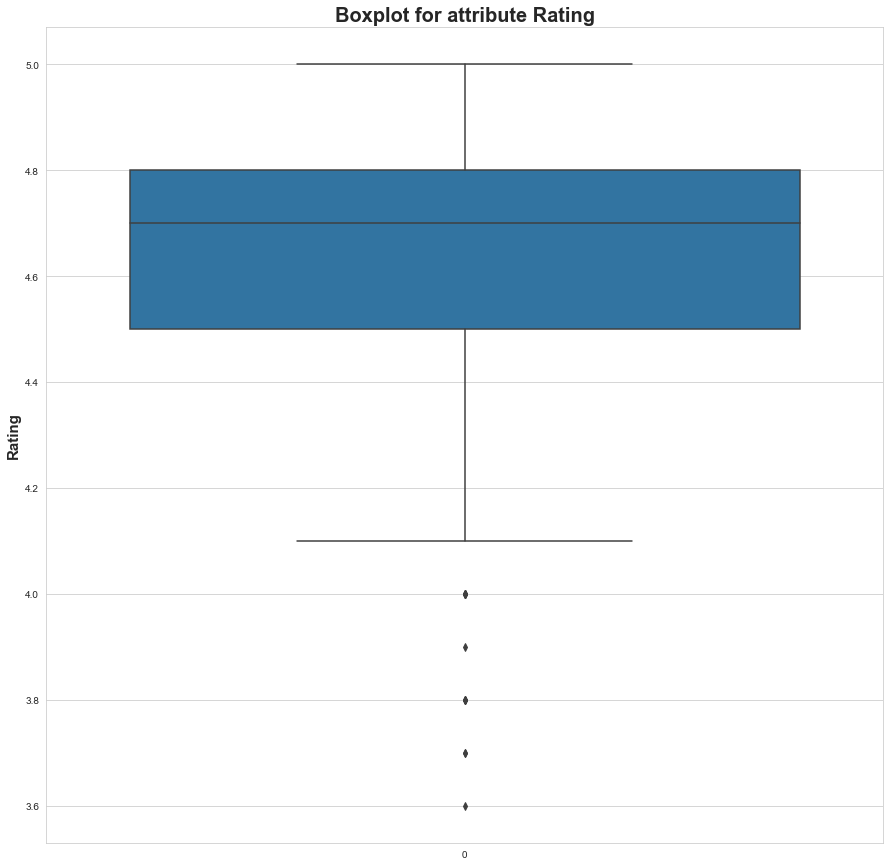

In [90]:
plt.figure(figsize=(15,15))
plt.ticklabel_format(useOffset=False, style='plain')
ax = sns.boxplot(data=df['Rating'])
ax.set_title('Boxplot for attribute Rating', fontweight='bold', fontsize='20')
ax.set_ylabel('Rating', fontweight='bold', fontsize='15');

* As category column have only 3 values, there will not be any outliers and product name is an object column with unique values, so it will also not have any outliers

#### In order to plot all these boxplots simultaneuosly, we will use standard scalar so that all numerical attributes have a mean of 0 and std. deviation of 1

In [91]:
dfx = df.copy()

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized = scaler.fit_transform(dfx[['Customers_Rated', 'Price', 'Rating']])
standardized

array([[-0.54945273, -0.28592751,  1.31450842],
       [-0.40378925, -0.2228432 ,  0.84209604],
       [-0.49231792, -0.33106184,  0.84209604],
       ...,
       [-0.53719513, -0.1012399 , -1.51996587],
       [ 0.0195592 , -0.15301468,  0.84209604],
       [-0.51601113, -0.27762694, -1.04755349]])

In [93]:
dfy = pd.DataFrame(standardized, columns=['Customers_Rated', 'Price', 'Rating'])

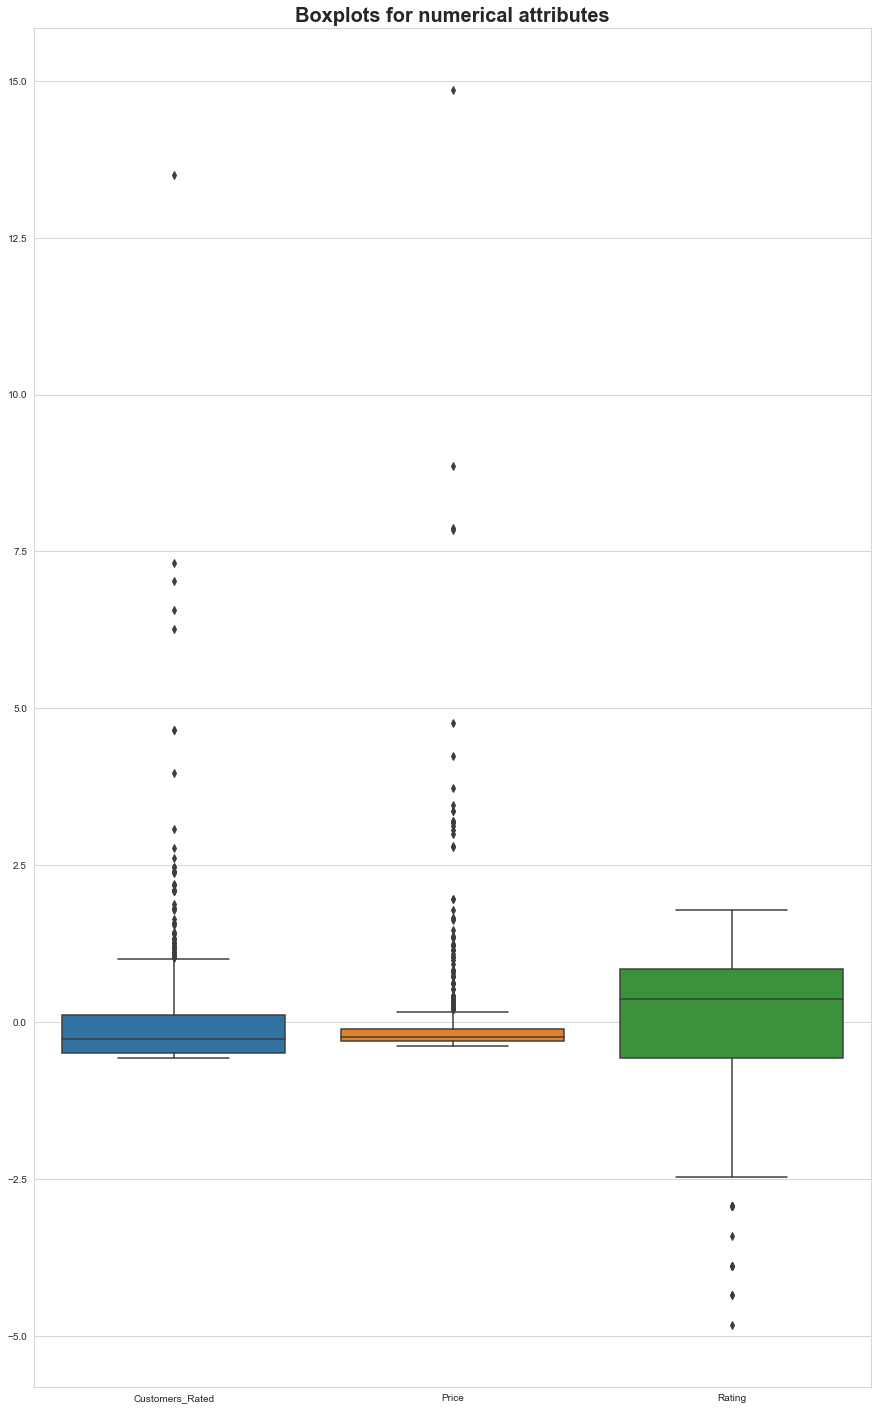

In [94]:
plt.figure(figsize=(15,25))
plt.ticklabel_format(useOffset=False, style='plain')
ax = sns.boxplot(data=dfy[['Customers_Rated', 'Price', 'Rating']])
ax.set_title('Boxplots for numerical attributes', fontweight='bold', fontsize='20');

## 7 .Handling Outliers

Outliers are the values that exceed the values of Upper and Lower Whiskers.
We have three methods to deal with outliers. Let's apply each of them one by one and see the differences.

###### Trimming

It involves simply removing the values from the dataset

Upper Whisker Value = 108866.0
Lower Whisker Value = -56054.0

Upper Whisker Value = 5.25
Lower Whisker Value = 4.050000000000001

Upper Whisker Value = 57.925
Lower Whisker Value = -16.674999999999997



In [95]:
dfnew = df.copy()

In [96]:
index1 = df[(df['Customers_Rated'] >= 108866.0)|(df['Customers_Rated'] <= 0)].index
dfnew.drop(index1, inplace=True)

In [97]:
index2 = dfnew[(dfnew['Price'] >= 57.925)|(dfnew['Price'] <= 0)].index
dfnew.drop(index2, inplace=True)

In [98]:
index3 = dfnew[(dfnew['Rating'] >= 5.25)|(dfnew['Rating'] <= 4.05)].index
dfnew.drop(index3, inplace=True)

In [99]:
dfnew

Product Name  Rating  \
0    Balloons over Broadway: The True Story of the ...     4.9   
1    Half Baked Harvest Super Simple: More Than 125...     4.8   
2                                       Turkey Trouble     4.8   
4    Braiding Sweetgrass: Indigenous Wisdom, Scient...     4.8   
5    Roku Voice Remote (Official) for Roku Players,...     4.7   
..                                                 ...     ...   
671  Goodnight, Goodnight Construction Site (Board ...     4.9   
672  (3 Pack) ONEBOM Firestick Remote Cover 3rd Gen...     4.6   
673  Bitvae Water Flosser Professional for Teeth , ...     4.3   
674  Melissa & Doug Let's Play House Dust! Sweep! M...     4.8   
675  Wired Earbuds with Microphone, Kimwood Wired E...     4.4   

     Customers_Rated  Price  Category  
0             1525.0  12.19         0  
1            11626.0  18.27         0  
2             5487.0   7.84         0  
4            14351.0  13.25         0  
5            53371.0  19.88         1  
..               ...    ...       ...  
671          20438.0   4.28         0  
672           1948.0   8.99         1  
673           2375.0  29.99         2  
674          40983.0  25.00         2  
675           3844.0  12.99         1  

[539 rows x 5 columns]

In [100]:
max(dfnew['Customers_Rated']), max(dfnew['Price']), max(dfnew['Rating'])

(106224.0, 54.95, 5.0)

In this method, outliers are handled but an important piece of information is trimmed which is not beneficial in realworld applications, so we dont use this method usually.

##### Quantile-based Flooring and Capping

This involves flooring and capping for the lower and higher values. Usually, we set lower limit at .10 quantile and upper limit as .90 quantile

In [101]:
dfnew1 = df.copy()

In [102]:
Customers_Rated_floor = df['Customers_Rated'].quantile(.10)
Customers_Rated_cap = df['Customers_Rated'].quantile(.90)

Customers_Rated_floor, Customers_Rated_cap

(938.0, 85915.5)

In [103]:
dfnew1['Customers_Rated'] = np.where(dfnew1['Customers_Rated'] < Customers_Rated_floor, Customers_Rated_floor, dfnew1['Customers_Rated'])
dfnew1['Customers_Rated'] = np.where(dfnew1['Customers_Rated'] > Customers_Rated_cap, Customers_Rated_cap, dfnew1['Customers_Rated'])

In [104]:
max(dfnew1['Customers_Rated'])

85915.5

In [105]:
Price_floor = df['Price'].quantile(.10)
Price_cap = df['Price'].quantile(.20)

Price_floor, Price_cap

(6.995, 9.98)

In [106]:
dfnew1['Price'] = np.where(dfnew1['Price'] < Price_floor, Price_floor, dfnew1['Price'])
dfnew1['Price'] = np.where(dfnew1['Price'] > Price_cap, Price_cap, dfnew1['Price'])

In [107]:
max(dfnew1['Price'])

9.98

In [108]:
Rating_floor = df['Rating'].quantile(.10)
Rating_cap = df['Rating'].quantile(.90)

Rating_floor, Rating_cap

(4.3, 4.8)

In [109]:
dfnew1['Rating'] = np.where(dfnew1['Rating'] < Rating_floor, Rating_floor, dfnew1['Rating'])
dfnew1['Rating'] = np.where(dfnew1['Rating'] > Rating_cap, Rating_cap, dfnew1['Rating'])

In [110]:
max(dfnew1['Rating'])

4.8

* This is a better way of handling outliers, because we do not discard the outliers rather floor or cap them  between ranges. But there is a method which is better than above two, because the original value of the outliers does not get lost, rather it is transformed

##### Log transformation

In [111]:
dfnew2 = df.copy()

In [112]:
dfnew2['Log_Customers_Rated'] = dfnew2['Customers_Rated'].map(lambda i: np.log(i) if i > 0 else 0)

In [113]:
dfnew2['Customers_Rated'].skew()

6.324882897543201

In [114]:
dfnew2['Log_Customers_Rated'].skew()

-1.3853681239875584

In [115]:
dfnew2['Log_Price'] = dfnew2['Price'].map(lambda i: np.log(i) if i > 0 else 0)

In [116]:
dfnew2['Price'].skew()

8.283835204863406

In [117]:
dfnew2['Log_Price'].skew()

1.229255505287353

In [118]:
dfnew2['Rating'].skew()

-1.3251818895640513

In [119]:
dfnew2

Product Name  Rating  \
0    Balloons over Broadway: The True Story of the ...     4.9   
1    Half Baked Harvest Super Simple: More Than 125...     4.8   
2                                       Turkey Trouble     4.8   
3    Bose QuietComfort 45 Bluetooth Wireless Noise ...     4.7   
4    Braiding Sweetgrass: Indigenous Wisdom, Scient...     4.8   
..                                                 ...     ...   
671  Goodnight, Goodnight Construction Site (Board ...     4.9   
672  (3 Pack) ONEBOM Firestick Remote Cover 3rd Gen...     4.6   
673  Bitvae Water Flosser Professional for Teeth , ...     4.3   
674  Melissa & Doug Let's Play House Dust! Sweep! M...     4.8   
675  Wired Earbuds with Microphone, Kimwood Wired E...     4.4   

     Customers_Rated   Price  Category  Log_Customers_Rated  Log_Price  
0             1525.0   12.19         0             7.329750   2.500616  
1            11626.0   18.27         0             9.360999   2.905260  
2             5487.0    7.84         0             8.610137   2.059239  
3             8749.0  329.00         1             9.076695   5.796058  
4            14351.0   13.25         0             9.571575   2.583998  
..               ...     ...       ...                  ...        ...  
671          20438.0    4.28         0             9.925151   1.453953  
672           1948.0    8.99         1             7.574558   2.196113  
673           2375.0   29.99         2             7.772753   3.400864  
674          40983.0   25.00         2            10.620913   3.218876  
675           3844.0   12.99         1             8.254269   2.564180  

[676 rows x 7 columns]

As Rating column is already skewed we dont need to transform it

In [120]:
df = dfnew2.copy()

###### Plotting log transformed scatterplots to visualize outliers

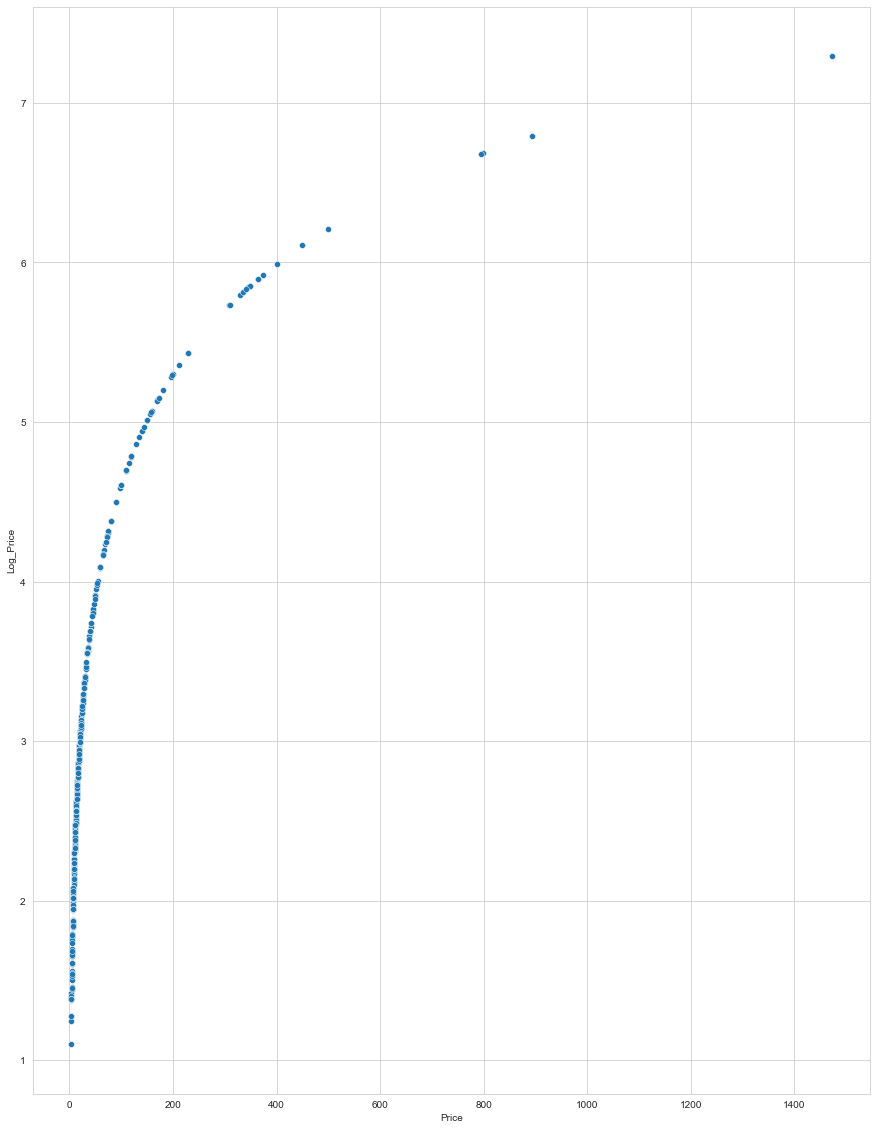

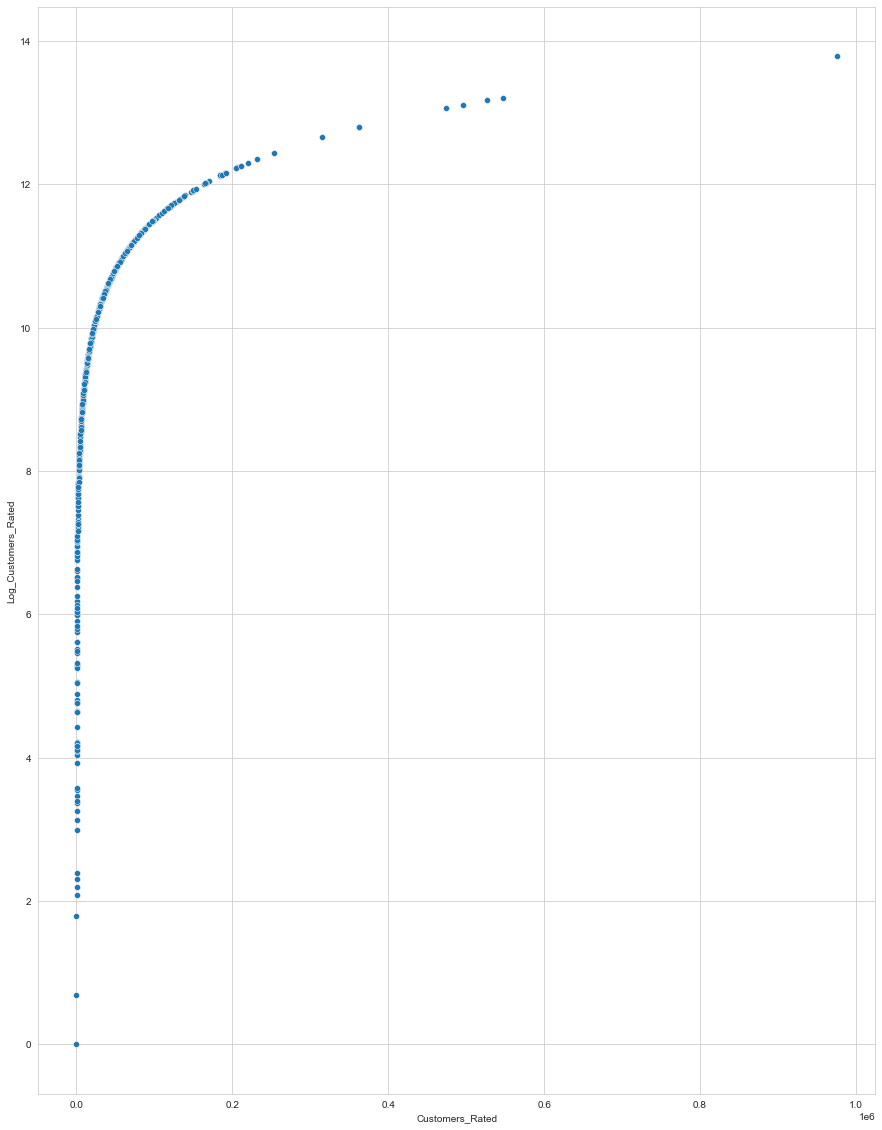

In [121]:
plt.figure(figsize=(15,20))
ax1 = sns.scatterplot(x='Price', y='Log_Price', data=dfnew2)
plt.figure(figsize=(15,20))
ax3 = sns.scatterplot(x='Customers_Rated', y='Log_Customers_Rated', data=dfnew2)

In the above scatterplots we can see, outliers are points which is scattered across graph while the non outliers are present where the points are densly populated

## 8. Unsupervised Learning

* We will apply the K-means clustering algorithm to perform the unsupervised machine learning

* K-means clustering helps in making clusters of similar observations together in order to see patterns in the data.

* K represents the number of clusters

### K-Means Clustering

In [122]:
from sklearn.cluster import KMeans

* Let's find different values of k for different set of features

In [123]:
from yellowbrick.cluster import KElbowVisualizer

In [124]:
model = KMeans()

* Let's make different pairs of different features and apply Kmeans clustering on each of them 

In [125]:
df1 = df[['Rating', 'Log_Customers_Rated']]
df2 = df[['Rating', 'Log_Price']]
df3 = df[['Rating', 'Category']]
df4 = df[['Log_Customers_Rated', 'Log_Price']]
df5 = df[['Log_Customers_Rated', 'Category']]
df6 = df[['Category', 'Log_Price']]

##### Kmeans clustering on Rating and Log_Customers_Rated

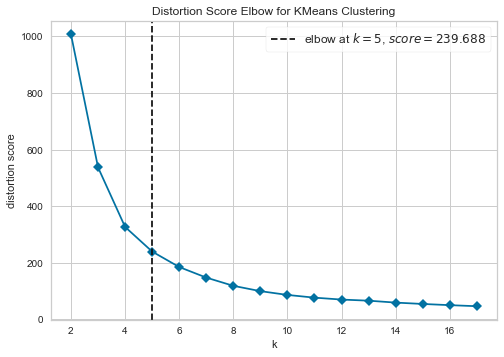

In [126]:
visualizer = KElbowVisualizer(model, k=(2,18), timings=False)
visualizer.fit(df1)
visualizer.show();

In [127]:
model = KMeans(n_clusters=5)
model.fit(df1)

KMeans(n_clusters=5)

In [128]:
df1['y_pred'] = model.predict(df1)
df1['y_pred'] = df1['y_pred'].astype('category')

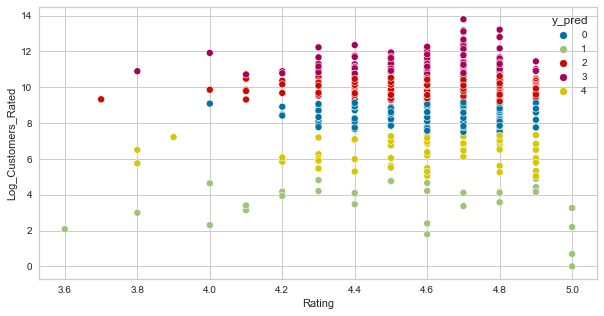

In [129]:
fig = plt.figure(figsize=(10, 5))
p1 = sns.scatterplot(x='Rating', y='Log_Customers_Rated', hue='y_pred', data=df1);

##### Kmeans clustering on Rating and Log_Price

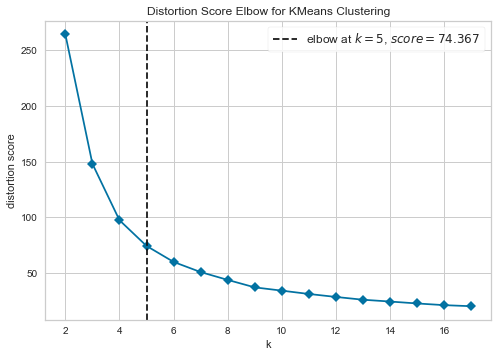

In [130]:
visualizer = KElbowVisualizer(model, k=(2,18), timings=False)
visualizer.fit(df2)
visualizer.show();

In [131]:
model = KMeans(n_clusters=5)
model.fit(df2)

KMeans(n_clusters=5)

In [132]:
df2['y_pred'] = model.predict(df2)
df2['y_pred'] = df2['y_pred'].astype('category')

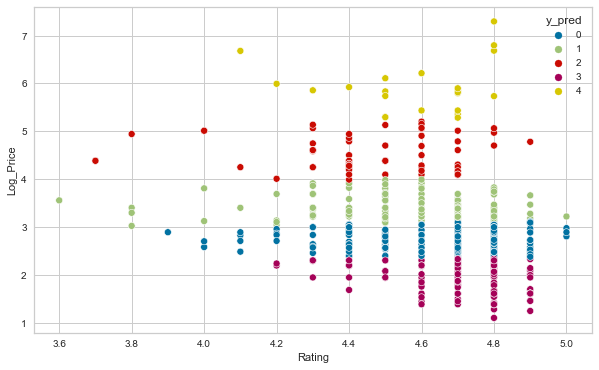

In [133]:
fig = plt.figure(figsize=(10, 6))
p2 = sns.scatterplot(x='Rating', y='Log_Price', hue='y_pred', data=df2);

##### Kmeans clustering on Rating and Category

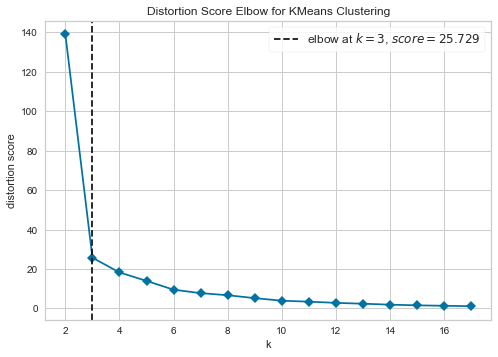

In [136]:
visualizer = KElbowVisualizer(model, k=(2,18), timings=False)
visualizer.fit(df3)
visualizer.show();

In [137]:
model = KMeans(n_clusters=3)
model.fit(df3)

KMeans(n_clusters=3)

In [138]:
df3['y_pred'] = model.predict(df3)
df3['y_pred'] = df3['y_pred'].astype('category')

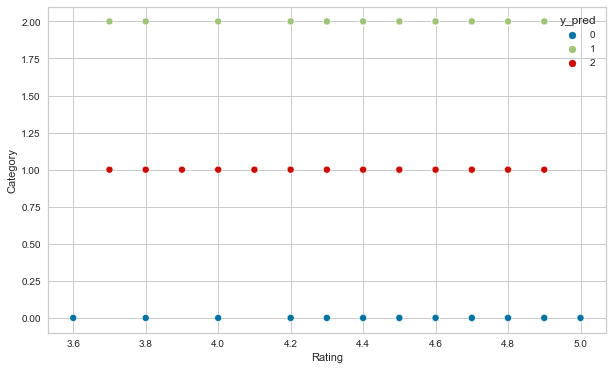

In [139]:
fig = plt.figure(figsize=(10, 6))
p3 = sns.scatterplot(x='Rating', y='Category', hue='y_pred', data=df3);

##### Kmeans clustering on Log_Customers_Rated and Log_Price

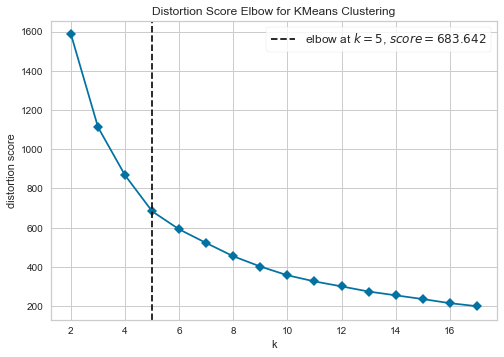

In [140]:
visualizer = KElbowVisualizer(model, k=(2,18), timings=False)
visualizer.fit(df4)
visualizer.show();

In [141]:
model = KMeans(n_clusters=6)
model.fit(df4)

KMeans(n_clusters=6)

In [142]:
df4['y_pred'] = model.predict(df4)
df4['y_pred'] = df4['y_pred'].astype('category')

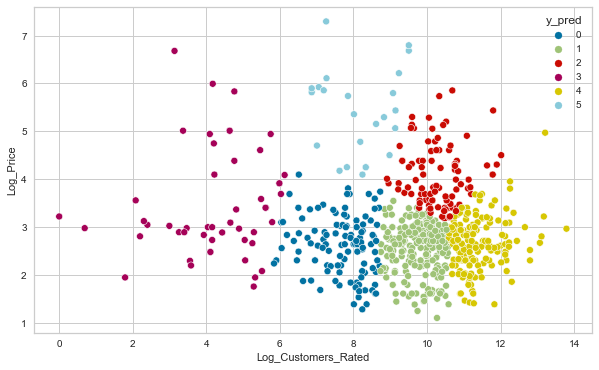

In [143]:
fig = plt.figure(figsize=(10, 6))
p4 = sns.scatterplot(x='Log_Customers_Rated', y='Log_Price', hue='y_pred', data=df4);

##### Kmeans clustering on Log_Customers_Rated and Category

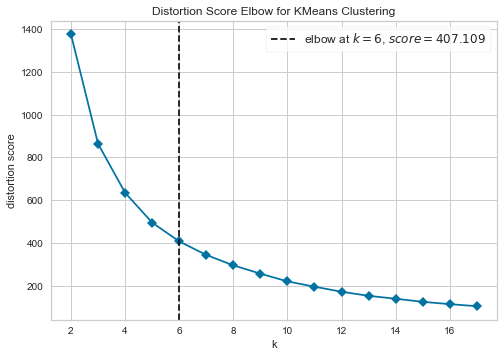

In [144]:
visualizer = KElbowVisualizer(model, k=(2,18), timings=False)
visualizer.fit(df5)
visualizer.show();

In [145]:
model = KMeans(n_clusters=6)
model.fit(df5)

KMeans(n_clusters=6)

In [146]:
df5['y_pred'] = model.predict(df5)
df5['y_pred'] = df5['y_pred'].astype('category')

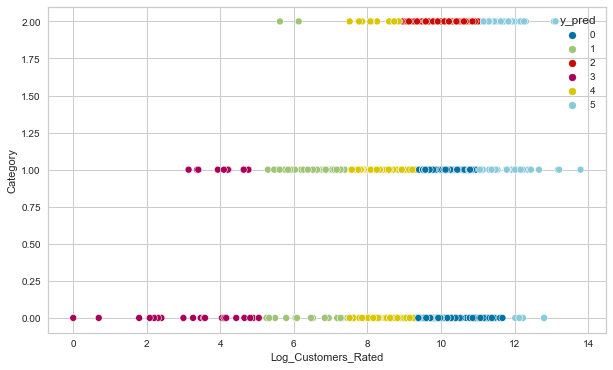

In [147]:
fig = plt.figure(figsize=(10, 6))
p5 = sns.scatterplot(x='Log_Customers_Rated', y='Category', hue='y_pred', data=df5);

##### Kmeans clustering on Category and Log_Price

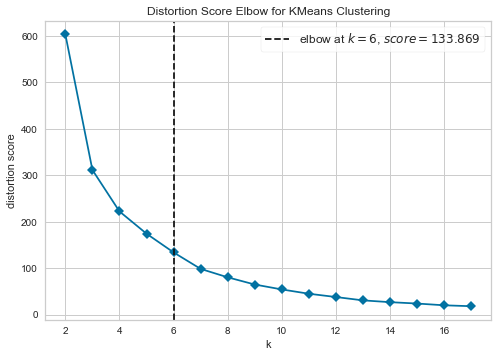

In [148]:
visualizer = KElbowVisualizer(model, k=(2,18), timings=False)
visualizer.fit(df6)
visualizer.show();

In [149]:
model = KMeans(n_clusters=6)
model.fit(df6)

KMeans(n_clusters=6)

In [150]:
df6['y_pred'] = model.predict(df6)
df6['y_pred'] = df6['y_pred'].astype('category')

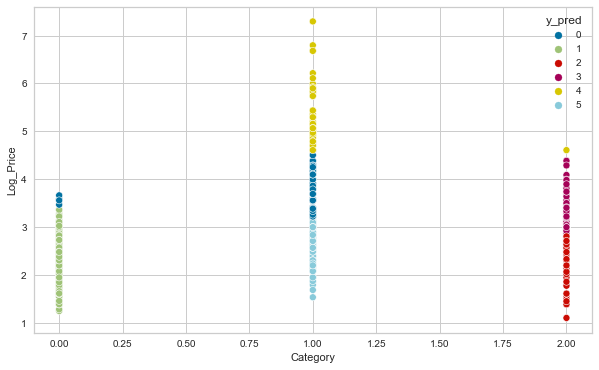

In [151]:
fig = plt.figure(figsize=(10, 6))
p6 = sns.scatterplot(x='Category', y='Log_Price', hue='y_pred', data=df6);

* We have successfully applied K-means clustering on our dataset and we see that the most defined clusters are formed between the feature Log_Customers_Rated and Log_Price as shown in plot p4

### Mean Shift Clustering

In [152]:
from sklearn.cluster import MeanShift, estimate_bandwidth

###### Since p4 is best looking kmeans cluster lets apply meanshift to those features and observe the clusters produced by mean shift algorithm

In [153]:
d = df4[['Log_Customers_Rated', 'Log_Price']]

In [154]:
bw = estimate_bandwidth(d, quantile=.2)

In [155]:
ms = MeanShift(bandwidth=bw)
ms.fit(d)

MeanShift(bandwidth=1.4253813815297895)

In [156]:
labels = ms.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

n_clusters_

5

In [157]:
y_pred = ms.predict(d)

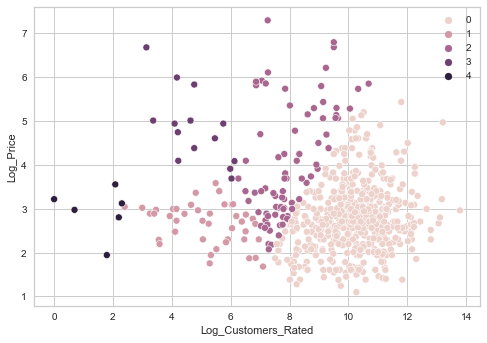

In [158]:
sns.scatterplot(x='Log_Customers_Rated', y= 'Log_Price', hue=y_pred, data=d);

Mean shift also produces better clusters than kmeans, but it does not need clusters to be specified specifically.

# This concludes our EDA along with Unsupervised Machine Learning